# **Bioinformatics Project -Drug Discovery [Part 4] Regression Models with Random Forest**

In this project, we will be building a machine learning model using the ChEMBL bioactivity data.

In **Part 4**, we will be building a regression model of acetylcholinesterase inhibitors using the random forest algorithm.

---

## **1. Import libraries**

In [3]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

## **2. Load the data set**

In [5]:
df = pd.read_csv('acetylcholinesterase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv')

## **3. Input features**
The ***Acetylcholinesterase*** data set contains 881 input features and 1 output variable (pIC50 values).

### **3.1. Input features**

In [10]:
X = df.drop('pIC50', axis=1)
X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6637,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6638,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6639,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6640,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### **3.2. Output features**

In [13]:
Y = df.pIC50
Y

0       6.124939
1       7.000000
2       4.301030
3       6.522879
4       6.096910
          ...   
6637    4.337242
6638    4.416688
6639    5.767004
6640    5.000000
6641    5.000000
Name: pIC50, Length: 6642, dtype: float64

### **3.3. Let's examine the data dimension**

In [16]:
X.shape

(6642, 881)

In [18]:
Y.shape

(6642,)

### **3.4. Remove low variance features**

In [21]:
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))    
X = selection.fit_transform(X)

In [23]:
X.shape

(6642, 144)

## **4. Data split (80/20 ratio)**

In [26]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [28]:
X_train.shape, Y_train.shape

((5313, 144), (5313,))

In [30]:
X_test.shape, Y_test.shape

((1329, 144), (1329,))

## Checking for missing values 

In [35]:
import numpy as np

print("Total missing values in X_train:", np.isnan(X_train).sum())
print("Total missing values in X_test:", np.isnan(X_test).sum())
print("Total missing values in Y_train:", np.isnan(Y_train).sum())
print("Total missing values in Y_test:", np.isnan(Y_test).sum())


Total missing values in X_train: 144
Total missing values in X_test: 0
Total missing values in Y_train: 0
Total missing values in Y_test: 0


In [53]:
from sklearn.impute import SimpleImputer

# Create an imputer instance
imputer = SimpleImputer(strategy="mean")  # Change to "median" if needed

# Fit and transform `X_train`
X_train_imputed = imputer.fit_transform(X_train)

# Transform `X_test` using the same imputer
X_test_imputed = imputer.transform(X_test)


In [58]:
print("Total missing values in X_train:", np.isnan(X_train).sum())
print("Total missing values in X_test:", np.isnan(X_test).sum())
print("Total missing values in Y_train:", np.isnan(Y_train).sum())
print("Total missing values in Y_test:", np.isnan(Y_test).sum())

Total missing values in X_train: 0
Total missing values in X_test: 0
Total missing values in Y_train: 0
Total missing values in Y_test: 0


In [60]:
print("Contains Inf in Y_train:", np.isinf(Y_train).sum())
print("Contains Inf in Y_test:", np.isinf(Y_test).sum())


Contains Inf in Y_train: 1
Contains Inf in Y_test: 0


Since inf is an extreme outlier, replacing it with the median of Y_train is a good approach:

In [63]:
Y_train = Y_train.replace([np.inf, -np.inf], np.nan)  # Convert inf to NaN
Y_train = Y_train.fillna(Y_train.median())  # Replace NaN with the median


#### Training the data again

## **5. Building a Regression Model using Random Forest**

In [66]:
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, Y_train)
r2 = model.score(X_test, Y_test)
print(r2)


0.30856524562771903


In [68]:
Y_pred = model.predict(X_test)

## **6. Scatter Plot of Experimental vs Predicted pIC50 Values**

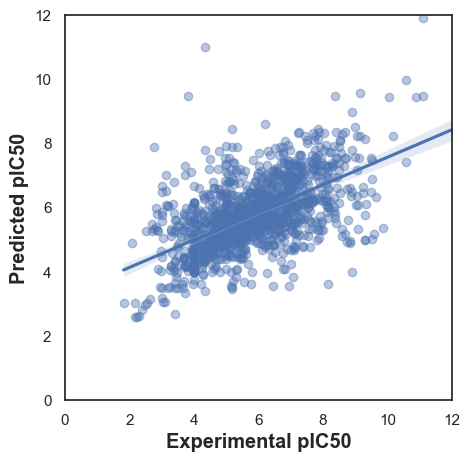

In [75]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(color_codes=True)
sns.set_style("white")

ax = sns.regplot(x=Y_test, y=Y_pred, scatter_kws={'alpha': 0.4})

ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(0, 12)
ax.set_ylim(0, 12)
ax.figure.set_size_inches(5, 5)
plt.show()